In [1]:
import pandas as pd
import numpy as np
import re
import datetime

In [2]:
inspection = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', low_memory=False, index_col='CAMIS')

In [326]:
inspection["STREET"] = map(lambda x:re.sub(' +',' ',x),inspection["STREET"])
inspection["ADDRESS"] = inspection["BUILDING"]+" " +inspection["STREET"]
inspection.head(30)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,ADDRESS
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10,A,02/18/2016,02/27/2016,Cycle Inspection / Initial Inspection,1007 MORRIS PARK AVE
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10,A,02/18/2016,02/27/2016,Cycle Inspection / Initial Inspection,1007 MORRIS PARK AVE
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,02/09/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6,A,02/09/2015,02/27/2016,Cycle Inspection / Initial Inspection,1007 MORRIS PARK AVE
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,03/03/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,A,03/03/2014,02/27/2016,Cycle Inspection / Initial Inspection,1007 MORRIS PARK AVE
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,10/10/2013,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/27/2016,Trans Fat / Second Compliance Inspection,1007 MORRIS PARK AVE
5,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,6,A,09/11/2013,02/27/2016,Cycle Inspection / Re-inspection,1007 MORRIS PARK AVE
6,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,09/11/2013,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,6,A,09/11/2013,02/27/2016,Cycle Inspection / Re-inspection,1007 MORRIS PARK AVE
7,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04C,Food worker does not use proper utensil to eli...,Critical,32,NaN,NaN,02/27/2016,Cycle Inspection / Initial Inspection,1007 MORRIS PARK AVE
8,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,32,NaN,NaN,02/27/2016,Cycle Inspection / Initial Inspection,1007 MORRIS PARK AVE
9,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,08/14/2013,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,32,NaN,NaN,02/27/2016,Cycle Inspection / Initial Inspection,1007 MORRIS PARK AVE


In [304]:
geolocate = pd.read_csv("../data/NYC DOHMH Geocoded Restaurant Locations.csv")
# geolocate['Location']=zip(geolocate['Latitude'],geolocate['Longitude'])
geolocate.head()

,CAMIS,Longitude,Latitude,Source,Dataset Date
0,41670166,-73.973873,40.686146,TIGER/ArcMap,5/15/2015
1,41670151,-73.981241,40.763977,TIGER/ArcMap,5/15/2015
2,41670042,-73.952571,40.586910,TIGER/ArcMap,5/15/2015
3,41670066,-73.990436,40.771542,TIGER/ArcMap,5/15/2015
4,41670188,-73.899113,40.825874,TIGER/ArcMap,5/15/2015


In [409]:
mergedInspection = pd.merge(inspection, geolocate, on="CAMIS")
mergedInspection.columns

Index([u'CAMIS', u'DBA', u'BORO', u'BUILDING', u'STREET', u'ZIPCODE', u'PHONE',
       u'CUISINE DESCRIPTION', u'INSPECTION DATE', u'ACTION',
       u'VIOLATION CODE', u'VIOLATION DESCRIPTION', u'CRITICAL FLAG', u'SCORE',
       u'GRADE', u'GRADE DATE', u'RECORD DATE', u'INSPECTION TYPE', u'ADDRESS',
       u'Longitude', u'Latitude', u'Source', u'Dataset Date'],
      dtype='object')

In [410]:
dataCol = ["CAMIS","STREET","DBA","ZIPCODE","BORO","CUISINE DESCRIPTION","INSPECTION DATE",
           "VIOLATION CODE","CRITICAL FLAG","SCORE","Longitude","Latitude","ADDRESS"]
fullData = mergedInspection[dataCol]
truncData = fullData.drop_duplicates()
# Translate the inspection date from
truncData['INSPECTION DATE'] = pd.to_datetime(truncData['INSPECTION DATE'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [411]:
truncData['YEAR'] = [i.year for i in truncData['INSPECTION DATE']]

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [412]:
truncData.head()

,CAMIS,STREET,DBA,ZIPCODE,BORO,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,Longitude,Latitude,ADDRESS,YEAR
0,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2016-02-18,04L,Critical,10,-73.856038,40.848265,1007 MORRIS PARK AVE,2016
1,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2016-02-18,08A,Not Critical,10,-73.856038,40.848265,1007 MORRIS PARK AVE,2016
2,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2015-02-09,06C,Critical,6,-73.856038,40.848265,1007 MORRIS PARK AVE,2015
3,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2014-03-03,10F,Not Critical,2,-73.856038,40.848265,1007 MORRIS PARK AVE,2014
4,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-10-10,NaN,Not Applicable,NaN,-73.856038,40.848265,1007 MORRIS PARK AVE,2013


In [413]:
cleanData  = truncData[(truncData.YEAR>=2010) & (truncData.YEAR<2016)]
cleanData = cleanData[~cleanData.SCORE.isnull()]
cleanData = cleanData.reset_index(drop=True)
cleanData.head(10)

,CAMIS,STREET,DBA,ZIPCODE,BORO,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,Longitude,Latitude,ADDRESS,YEAR
0,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2015-02-09,06C,Critical,6,-73.856038,40.848265,1007 MORRIS PARK AVE,2015
1,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2014-03-03,10F,Not Critical,2,-73.856038,40.848265,1007 MORRIS PARK AVE,2014
2,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-09-11,04L,Critical,6,-73.856038,40.848265,1007 MORRIS PARK AVE,2013
3,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-09-11,04N,Critical,6,-73.856038,40.848265,1007 MORRIS PARK AVE,2013
4,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-08-14,04C,Critical,32,-73.856038,40.848265,1007 MORRIS PARK AVE,2013
5,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-08-14,04L,Critical,32,-73.856038,40.848265,1007 MORRIS PARK AVE,2013
6,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-08-14,06A,Critical,32,-73.856038,40.848265,1007 MORRIS PARK AVE,2013
7,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-08-14,06C,Critical,32,-73.856038,40.848265,1007 MORRIS PARK AVE,2013
8,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-08-14,08A,Not Critical,32,-73.856038,40.848265,1007 MORRIS PARK AVE,2013
9,30075445,MORRIS PARK AVE,MORRIS PARK BAKE SHOP,10462,BRONX,Bakery,2013-08-14,10F,Not Critical,32,-73.856038,40.848265,1007 MORRIS PARK AVE,2013


In [420]:
venueList = cleanData[["ADDRESS",'CAMIS','Latitude','Longitude']].drop_duplicates().reset_index(drop=True)
venueList.head()

,ADDRESS,CAMIS,Latitude,Longitude
0,1007 MORRIS PARK AVE,30075445,40.848265,-73.856038
1,469 FLATBUSH AVENUE,30112340,40.663062,-73.962302
2,351 WEST 57 STREET,30191841,40.767487,-73.984552
3,2780 STILLWELL AVENUE,40356018,40.579659,-73.982100
4,8825 ASTORIA BOULEVARD,40356151,40.760252,-73.860365


In [415]:
data311 = pd.read_csv("../data/Food_Poison_311.csv", low_memory=False)
data311.columns

Index([u'Unique Key', u'Created Date', u'Agency', u'Agency Name',
       u'Complaint Type', u'Descriptor', u'Location Type', u'Incident Zip',
       u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',
       u'Bridge

In [416]:
data311.head()

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32776944,2/26/16 21:58,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Food Contaminated,Restaurant/Bar/Deli/Bakery,10034,233 DYCKMAN STREET,DYCKMAN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865967,-73.927767,"(40.86596698951721, -73.92776686302547)"
1,32777219,2/26/16 21:28,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Other (Explain Below),11375,107-20 71 ROAD,71 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.720067,-73.843469,"(40.720066707170325, -73.84346884865374)"
2,32779885,2/26/16 20:47,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Food Worker Activity,Restaurant/Bar/Deli/Bakery,11205,499 MYRTLE AVENUE,MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693513,-73.965107,"(40.693513423719516, -73.96510736436561)"
3,32779510,2/26/16 20:41,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Toilet Facility,Restaurant/Bar/Deli/Bakery,11205,499 MYRTLE AVENUE,MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693513,-73.965107,"(40.693513423719516, -73.96510736436561)"
4,32780858,2/26/16 20:10,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10467,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.885693,-73.861639,"(40.88569315009606, -73.86163891179699)"


In [417]:
foodPoisoning = data311[(data311["Complaint Type"]=="Food Poisoning") & (data311["Descriptor"]=="3 or More")& 
                        (~data311["Incident Address"].isnull())]
foodPoisoning.head()

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
15,32781969,2/26/16 16:01,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10017,125 PARK AVENUE,PARK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.751681,-73.977677,"(40.75168071773283, -73.97767678908771)"
50,32776118,2/25/16 11:54,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Other (Explain Below),10013,211 GRAND STREET,GRAND STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.718927,-73.996162,"(40.71892693050164, -73.99616164535036)"
56,32772774,2/25/16 8:41,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10002,81 CHRYSTIE STREET,CHRYSTIE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.717368,-73.994235,"(40.717367826597204, -73.9942353879218)"
60,32770606,2/25/16 0:00,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Food Cart Vendor,11206,105 EVERGREEN AVENUE,EVERGREEN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699595,-73.931950,"(40.699594725042346, -73.93195026382766)"
91,32767205,2/24/16 11:21,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10027,310 MALCOLM X BOULEVARD,MALCOLM X BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.808165,-73.945187,"(40.80816473916284, -73.94518676144587)"


In [418]:
fPLocation = foodPoisoning[['Longitude','Latitude',"Incident Address"]].reset_index(drop=True)
fPLocation.drop_duplicates(inplace=True)
fPLocation.head()

,Longitude,Latitude,Incident Address
0,-73.977677,40.751681,125 PARK AVENUE
1,-73.996162,40.718927,211 GRAND STREET
2,-73.994235,40.717368,81 CHRYSTIE STREET
3,-73.931950,40.699595,105 EVERGREEN AVENUE
4,-73.945187,40.808165,310 MALCOLM X BOULEVARD


In [419]:
fPLocation.to_csv("../data/food_poisoning_location.csv")
venueList.to_csv("../data/venue_list.csv")

In [389]:
fPLocation = pd.read_csv("../data/food_poisoning_location.csv")
venueList = pd.read_csv("../data/venue_list.csv")

In [390]:
t = 0
for i, location in fPLocation.iterrows():
    add1 = location["Incident Address"]
    re_add1 = re.sub(' +',' ',add1)
#     print re.sub(' +',' ',add1)
    fPLon = float(location['Longitude'])
    fPLat = float(location['Latitude'])
    for j, venue in venueList.iterrows():
        venLon = float(venue['Longitude'])
        venLat = float(venue['Latitude'])
        add2 = str(venue["ADDRESS"])
        re_add2 = re.sub(' +',' ',add2)
        if ((abs(fPLon-venLon)+abs(fPLat-venLat)<0.001)&(re_add1==re_add2)):
            t +=1
            print(i,j)
            break

(0, 3789)
(8, 57)
(9, 5627)
(10, 19463)
(13, 10206)
(14, 1267)
(15, 10307)
(16, 13127)
(21, 10116)
(25, 1812)
(26, 7592)
(35, 4992)
(36, 2147)
(49, 1721)
(50, 5281)
(51, 1361)
(52, 14644)
(53, 14902)
(54, 10718)
(58, 15911)
(60, 12888)
(62, 5574)
(65, 12835)
(68, 11451)
(71, 11184)
(72, 11832)
(73, 10914)
(74, 5787)
(76, 11009)
(77, 14086)
(79, 1754)
(86, 4580)
(87, 11806)
(91, 4981)
(92, 11749)
(100, 5321)
(103, 10785)
(104, 15718)
(108, 14211)
(109, 7032)
(112, 13750)
(131, 15606)
(134, 3572)
(137, 9965)
(144, 4154)
(145, 8805)
(149, 14729)
(159, 11127)
(160, 10276)
(161, 56)
(162, 5068)
(163, 1171)
(164, 2661)
(166, 13816)
(176, 1139)
(182, 7428)
(188, 974)
(192, 12802)
(200, 8813)
(209, 9711)
(213, 10074)
(215, 4492)
(220, 12510)
(227, 13810)
(229, 594)
(231, 11427)
(234, 5957)
(236, 13990)
(247, 10813)
(256, 6408)
(258, 5068)
(259, 12308)
(262, 1497)
(263, 19074)
(264, 6424)
(274, 6833)
(277, 9147)
(282, 13858)
(283, 11059)
(284, 1072)
(285, 13312)
(291, 16879)
(296, 13324)
(297, 

In [ ]:
#preprocessing
len(fPLocation.drop_duplicates())

In [448]:
fpvenue = pd.read_excel("../data/fpvenue.xlsx",header=None)

In [449]:
fpvenuelist = fpvenue[0].tolist()

In [421]:
venueList

,ADDRESS,CAMIS,Latitude,Longitude
0,1007 MORRIS PARK AVE,30075445,40.848265,-73.856038
1,469 FLATBUSH AVENUE,30112340,40.663062,-73.962302
2,351 WEST 57 STREET,30191841,40.767487,-73.984552
3,2780 STILLWELL AVENUE,40356018,40.579659,-73.982100
4,8825 ASTORIA BOULEVARD,40356151,40.760252,-73.860365
5,7114 AVENUE U,40356483,40.619842,-73.907323
6,6409 11 AVENUE,40356649,40.629148,-74.005308
7,1839 NOSTRAND AVENUE,40356731,40.640922,-73.948440
8,2300 SOUTHERN BOULEVARD,40357217,40.853440,-73.881568
9,7715 18 AVENUE,40357437,40.612089,-73.997207


In [454]:
out = venueList.ix[fpvenuelist]
out.to_csv("../data/targetVenue.csv")

In [3]:
venue = pd.read_csv('targetVenue.csv')

In [4]:
CAMISlist = venue.CAMIS.tolist()

In [5]:
studydf = inspection.ix[CAMISlist]

In [6]:
studydf = studydf.dropna(subset = ['VIOLATION CODE'])

In [7]:
studydf.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
CAMIS,,,,,,,,,,,,,,,,,
40363920,NEW GOLDEN BILLION,BROOKLYN,976,RUTLAND ROAD,11212,7187357707,Chinese,10/10/2015,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,10/10/2015,02/27/2016,Cycle Inspection / Initial Inspection
40363920,NEW GOLDEN BILLION,BROOKLYN,976,RUTLAND ROAD,11212,7187357707,Chinese,10/10/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,10/10/2015,02/27/2016,Cycle Inspection / Initial Inspection
40363920,NEW GOLDEN BILLION,BROOKLYN,976,RUTLAND ROAD,11212,7187357707,Chinese,10/10/2015,Violations were cited in the following area(s).,15L,Smoke free workplace smoking policy inadequate...,Not Critical,NaN,NaN,NaN,02/27/2016,Smoke-Free Air Act / Initial Inspection
40363920,NEW GOLDEN BILLION,BROOKLYN,976,RUTLAND ROAD,11212,7187357707,Chinese,04/21/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,3,A,04/21/2015,02/27/2016,Cycle Inspection / Re-inspection
40363920,NEW GOLDEN BILLION,BROOKLYN,976,RUTLAND ROAD,11212,7187357707,Chinese,04/01/2015,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,17,NaN,NaN,02/27/2016,Cycle Inspection / Initial Inspection


In [8]:
studydf.to_csv("studydf.csv")

In [9]:
len(studydf)

13593

In [10]:
from pymining import seqmining
from pymining import itemmining, assocrules, perftesting

In [11]:
violationdf = studydf[['INSPECTION DATE','VIOLATION CODE']].reset_index()

In [42]:
violationdf.head()

,CAMIS,INSPECTION DATE,VIOLATION CODE
0,40363920,10/10/2015,06C
1,40363920,10/10/2015,10F
2,40363920,10/10/2015,15L
3,40363920,04/21/2015,10F
4,40363920,04/01/2015,02G


In [13]:
violationdf['VIOLATION CODE'] = violationdf['VIOLATION CODE'].astype('str')

In [43]:
len(violationdf['CAMIS'].value_counts())

513

In [14]:
plotseries = violationdf['VIOLATION CODE'].value_counts().iloc[0:20]

In [15]:
plotseries.values

array([1752, 1363, 1207,  947,  863,  837,  741,  688,  684,  397,  357,
        356,  267,  234,  191,  177,  169,  164,  146,  139])

In [16]:
plotdf = plotseries

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/Users/Dexter/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


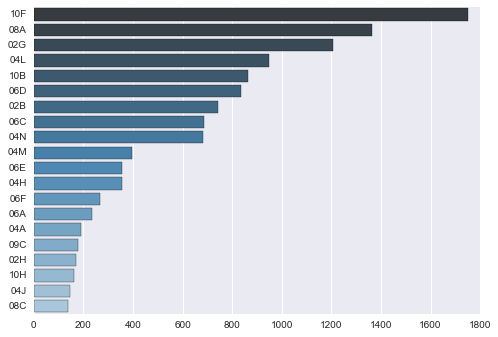

In [17]:
ax = sns.barplot(y=plotseries.index, x=plotseries.values, palette="Blues_d")

In [17]:
testdf = violationdf.groupby(['CAMIS'])['VIOLATION CODE'].apply(list)

In [32]:
minelist = testdf.tolist()[0:10]

In [33]:
minelist = tuple(tuple(x) for x in minelist)

In [35]:
relim_input = itemmining.get_relim_input(minelist)

In [36]:
item_sets = itemmining.relim(relim_input, min_support=2)

In [37]:
rules = assocrules.mine_assoc_rules(item_sets, min_support=2, min_confidence=0.5)

In [38]:
rules

[(frozenset({'02B',
             '02G',
             '02H',
             '04H',
             '04L',
             '06C',
             '06D',
             '06F',
             '10B',
             '10F',
             '16B'}),
  frozenset({'10H'}),
  2,
  1.0),
 (frozenset({'02B',
             '02G',
             '02H',
             '04H',
             '06C',
             '06D',
             '06F',
             '10B',
             '10F',
             '16B'}),
  frozenset({'04L', '10H'}),
  2,
  1.0),
 (frozenset({'02B', '02H', '04H', '06C', '06D', '06F', '10B', '10F', '16B'}),
  frozenset({'02G', '04L', '10H'}),
  2,
  1.0),
 (frozenset({'02H', '04H', '06C', '06D', '06F', '10B', '10F', '16B'}),
  frozenset({'02B', '02G', '04L', '10H'}),
  2,
  1.0),
 (frozenset({'02H', '04H', '06C', '06D', '06F', '10F', '16B'}),
  frozenset({'02B', '02G', '04L', '10B', '10H'}),
  2,
  1.0),
 (frozenset({'02H', '06C', '06D', '06F', '10F', '16B'}),
  frozenset({'02B', '02G', '04H', '04L', '10B', '10H'}),
  2,

In [39]:
freq_seqs = seqmining.freq_seq_enum(minelist, 2)

In [40]:
freq_seqs

{(('04N', '08A', '02G', '06D', '10B', '08A', '06D', '10F', '02G', '06D'), 2),
 (('04N', '08A', '10F', '06D', '02B', '06D', '16B'), 2),
 (('10F', '06D', '08A', '16B', '10B', '02G', '02G'), 2),
 (('04H', '02B', '10F', '02G'), 2),
 (('08A', '10F', '02G', '06D', '04L', '10F', '02G', '02G', '10F'), 2),
 (('04N', '08A', '02G', '04N', '10B', '10F', '16B', '10F', '10F', '10F'), 2),
 (('06D', '06C', '08A', '04L', '06D', '10B', '06D'), 2),
 (('06D', '10F', '10F', '06D', '08A', '16B', '10B', '06D'), 2),
 (('10F', '10F', '04N', '08A', '16B', '10B', '02G', '02G', '06D'), 2),
 (('06D', '10F', '06D', '10B', '10F', '16B', '06D', '10B', '02G'), 2),
 (('04N', '10F', '06D', '04N', '04L', '08A', '10F', '02G', '10B', '10F'), 2),
 (('06E', '06C', '08A', '16B', '06D', '10F', '10E', '06D'), 2),
 (('10F', '02B', '06D', '04L', '08A', '04H', '06D', '08A', '10B'), 2),
 (('10F', '02G', '04N', '04L', '02G', '10F', '10B'), 2),
 (('06D', '10F', '08A', '06D', '10F', '10F', '10F', '02G'), 2),
 (('10F', '10F', '06D', '0

In [44]:
rules2 = assocrules.mine_assoc_rules(item_sets, min_support=1, min_confidence=0.5)
rules2

[(frozenset({'02B',
             '02G',
             '02H',
             '04H',
             '04L',
             '06C',
             '06D',
             '06F',
             '10B',
             '10F',
             '16B'}),
  frozenset({'10H'}),
  2,
  1.0),
 (frozenset({'02B',
             '02G',
             '02H',
             '04H',
             '06C',
             '06D',
             '06F',
             '10B',
             '10F',
             '16B'}),
  frozenset({'04L', '10H'}),
  2,
  1.0),
 (frozenset({'02B', '02H', '04H', '06C', '06D', '06F', '10B', '10F', '16B'}),
  frozenset({'02G', '04L', '10H'}),
  2,
  1.0),
 (frozenset({'02H', '04H', '06C', '06D', '06F', '10B', '10F', '16B'}),
  frozenset({'02B', '02G', '04L', '10H'}),
  2,
  1.0),
 (frozenset({'02H', '04H', '06C', '06D', '06F', '10F', '16B'}),
  frozenset({'02B', '02G', '04L', '10B', '10H'}),
  2,
  1.0),
 (frozenset({'02H', '06C', '06D', '06F', '10F', '16B'}),
  frozenset({'02B', '02G', '04H', '04L', '10B', '10H'}),
  2,